## Collecting data

In [36]:
import pandas as pd

In [37]:
data=pd.read_csv("mcdonalds.csv")
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


## Exploring data

In [38]:
print(data.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [39]:
data.shape

(1453, 15)

In [40]:
data.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [41]:
data.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [42]:
selected_columns = ["yummy", "convenient", "spicy", "fattening", "greasy", "fast",
                     "cheap", "tasty", "expensive", "healthy", "disgusting", "Like",
                     "Age", "VisitFrequency", "Gender"]

In [43]:
mcdonalds_selected = data[selected_columns]
print(mcdonalds_selected.head(3))

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [44]:
MD_x=data.iloc[:,0:11].replace("Yes",1).replace("No",0)

In [45]:
MD_x

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [46]:
column_means = MD_x.mean().round(2)
column_means

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [47]:
import pandas as pd
from sklearn.decomposition import PCA
from tabulate import tabulate

# Assuming MD_x is already prepared

# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Create a DataFrame to store the summary
summary_df = pd.DataFrame({
    "Principal Component": range(1, len(pca.explained_variance_) + 1),
    "Standard Deviation": pca.explained_variance_,
    "Proportion of Variance": pca.explained_variance_ratio_,
})

# Calculate cumulative proportion and add it to the DataFrame
summary_df["Cumulative Proportion"] = summary_df["Proportion of Variance"].cumsum()

# Rearrange the columns
summary_df = summary_df[['Principal Component', 'Standard Deviation', 'Proportion of Variance', 'Cumulative Proportion']]

# Print the summary table using tabulate
table = tabulate(summary_df, headers='keys', tablefmt='grid', showindex=False)

# Print the table
print("PCA Summary:")
print(table)


PCA Summary:
+-----------------------+----------------------+--------------------------+-------------------------+
|   Principal Component |   Standard Deviation |   Proportion of Variance |   Cumulative Proportion |
+=======================+======================+==========================+=========================+
|                     1 |            0.573124  |                0.299447  |                0.299447 |
+-----------------------+----------------------+--------------------------+-------------------------+
|                     2 |            0.369002  |                0.192797  |                0.492244 |
+-----------------------+----------------------+--------------------------+-------------------------+
|                     3 |            0.254641  |                0.133045  |                0.62529  |
+-----------------------+----------------------+--------------------------+-------------------------+
|                     4 |            0.15904   |                0.083

In [48]:
import pandas as pd
from sklearn.decomposition import PCA

# Assuming MD_x is already prepared

# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Create a DataFrame to store the loadings
loadings_df = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)])

# Add the variable names as index
loadings_df.index = MD_x.columns

# Display the loadings table with better formatting
with pd.option_context('display.float_format', '{:.2f}'.format):
    print("PCA Loadings:")
    print(loadings_df)


PCA Loadings:
             PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10  PC11
yummy      -0.48  0.36 -0.30  0.06 -0.31  0.17 -0.28  0.01  0.57 -0.11  0.05
convenient -0.16  0.02 -0.06 -0.14  0.28 -0.35 -0.06 -0.11 -0.02 -0.67 -0.54
spicy      -0.01  0.02 -0.04  0.20  0.07 -0.36  0.71  0.38  0.40 -0.08  0.14
fattening   0.12 -0.03 -0.32 -0.35 -0.07 -0.41 -0.39  0.59 -0.16 -0.01  0.25
greasy      0.30 -0.06 -0.80  0.25  0.36  0.21  0.04 -0.14 -0.00  0.01  0.00
fast       -0.11 -0.09 -0.06 -0.10  0.11 -0.59 -0.09 -0.63  0.17  0.24  0.34
cheap      -0.34 -0.61 -0.15  0.12 -0.13 -0.10 -0.04  0.14  0.08  0.43 -0.49
tasty      -0.47  0.31 -0.29 -0.00 -0.21 -0.08  0.36 -0.07 -0.64  0.08  0.02
expensive   0.33  0.60  0.02  0.07 -0.00 -0.26 -0.07  0.03  0.07  0.45 -0.49
healthy    -0.21  0.08  0.19  0.76  0.29 -0.18 -0.35  0.18 -0.19 -0.04  0.16
disgusting  0.37 -0.14 -0.09  0.37 -0.73 -0.21 -0.03 -0.17 -0.07 -0.29 -0.04


In [49]:
pca.components_.shape

(11, 11)

In [50]:
# Standardize the data for better visualization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)


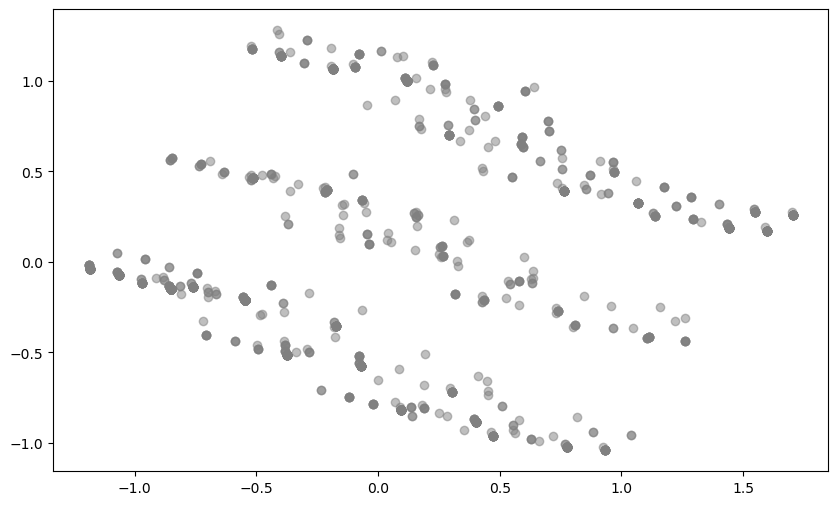

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c='grey', label='Original Data', alpha=0.5)


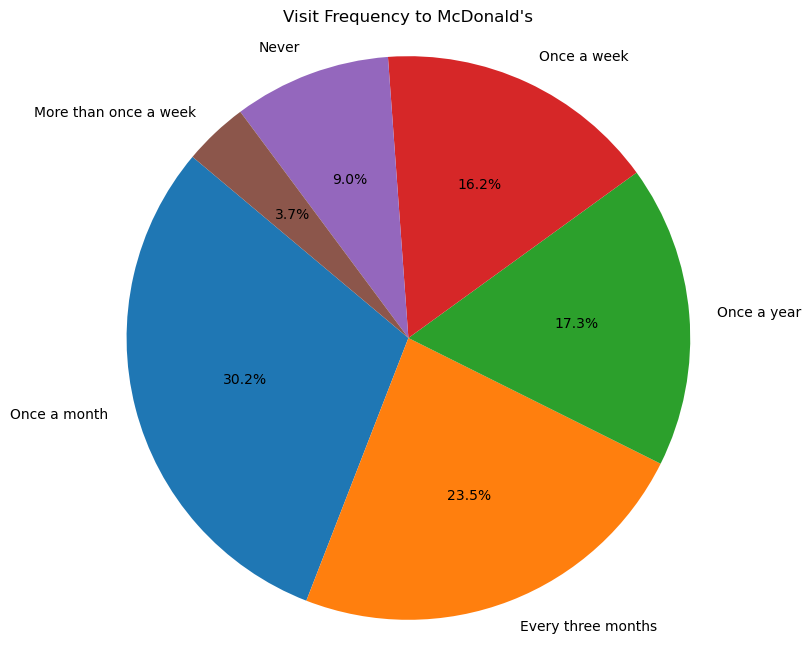

In [52]:
import matplotlib.pyplot as plt

# Count the frequencies of each category
visit_frequency_counts = data['VisitFrequency'].value_counts()

# Create a pie chart for Visit Frequency
plt.figure(figsize=(8, 8))
plt.pie(visit_frequency_counts, labels=visit_frequency_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Visit Frequency to McDonald\'s')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


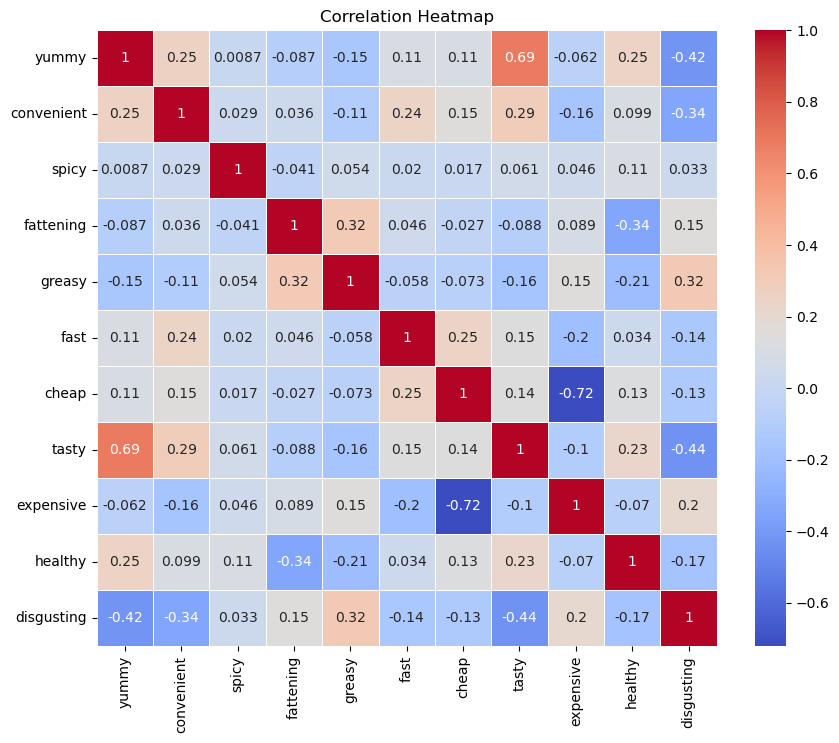

In [53]:
correlation_matrix = MD_x.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()



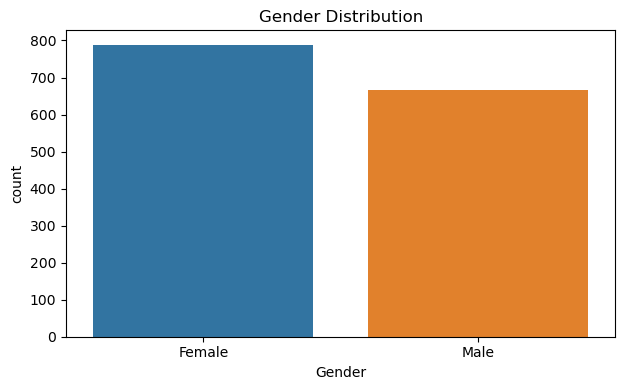

In [54]:
plt.figure(figsize=(12, 4))



plt.subplot(1, 2, 2)
sns.countplot(data=data, x='Gender')
plt.title('Gender Distribution')

plt.tight_layout()
plt.show()


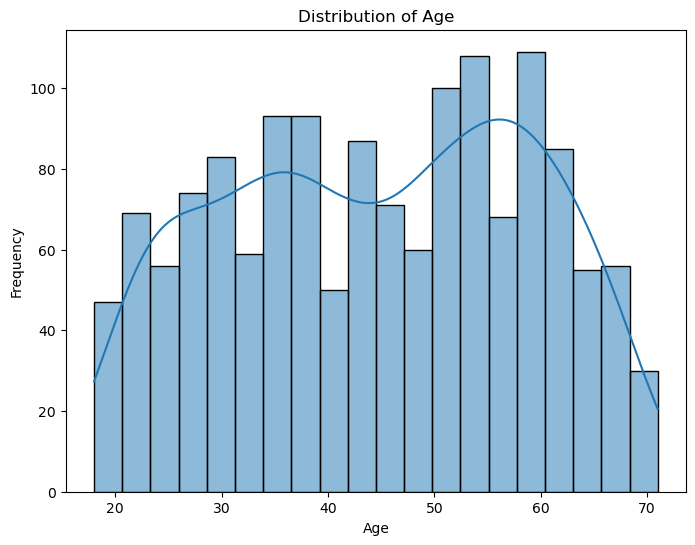

In [55]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Age', bins=20, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

## Extracting segments

### Using k-Means

C:\Users\gcaba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\gcaba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\gcaba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\gcaba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

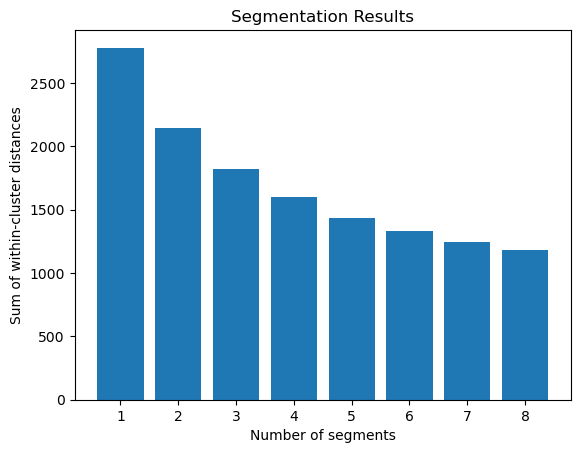

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Set random seed for reproducibility
np.random.seed(1234)

nrep = 10
num_segments = range(1, 9)
within_cluster_distances = []
MD_km28 = {}

# Assuming MD is your data (MD_x)
for k in num_segments:
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(MD_x)
    within_cluster_distances.append(kmeans.inertia_)
    MD_km28[str(k)] = kmeans

# Plot within-cluster distances
plt.bar(num_segments, within_cluster_distances)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
plt.show()


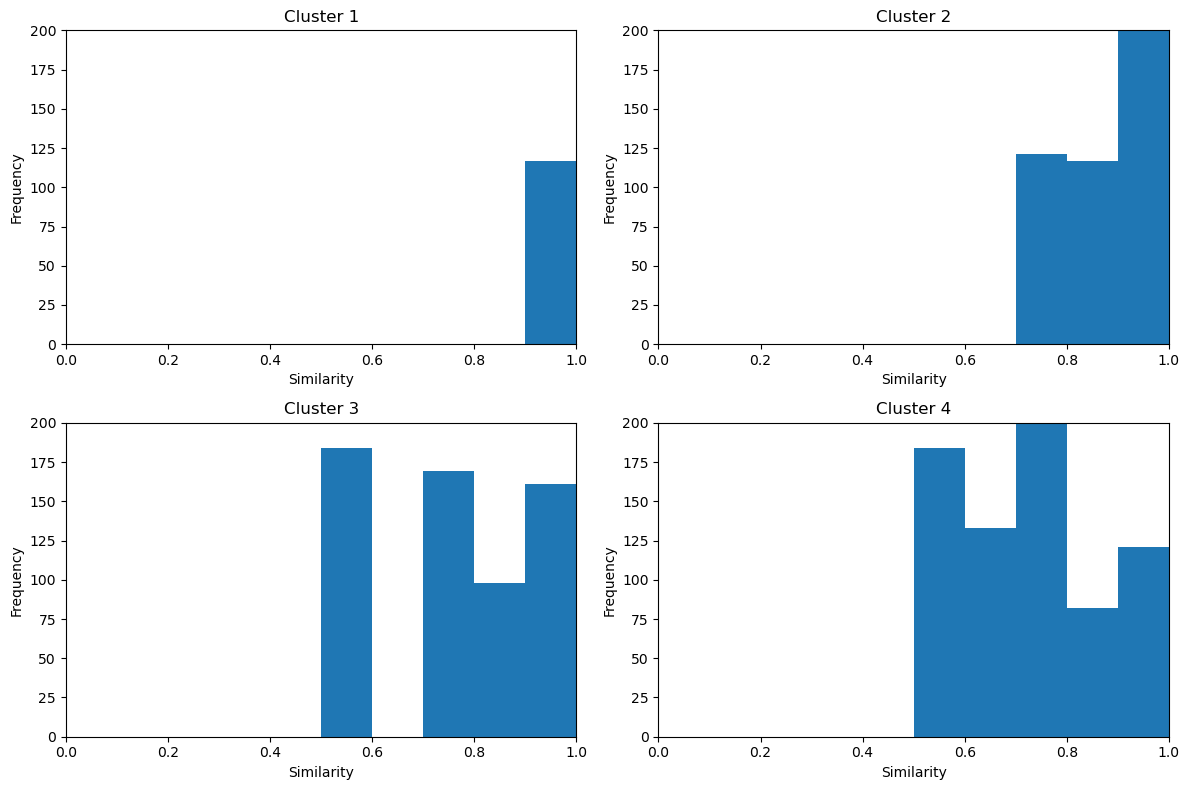

In [57]:
import matplotlib.pyplot as plt

range_values = (0, 1)
num_bins = 10
max_frequency = 200

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i in range(1, 5):
    labels = MD_km28[str(i)].predict(MD_x)  # Assuming MD_x is your data
    similarities = MD_km28[str(i)].transform(MD_x).min(axis=1)
    row = (i - 1) // 2
    col = (i - 1) % 2

    axs[row, col].hist(similarities, bins=num_bins, range=range_values)
    axs[row, col].set_xlabel('Similarity')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title('Cluster {}'.format(i))

    axs[row, col].set_xlim(range_values)
    axs[row, col].set_ylim(0, max_frequency)

    axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.tight_layout()
plt.show()


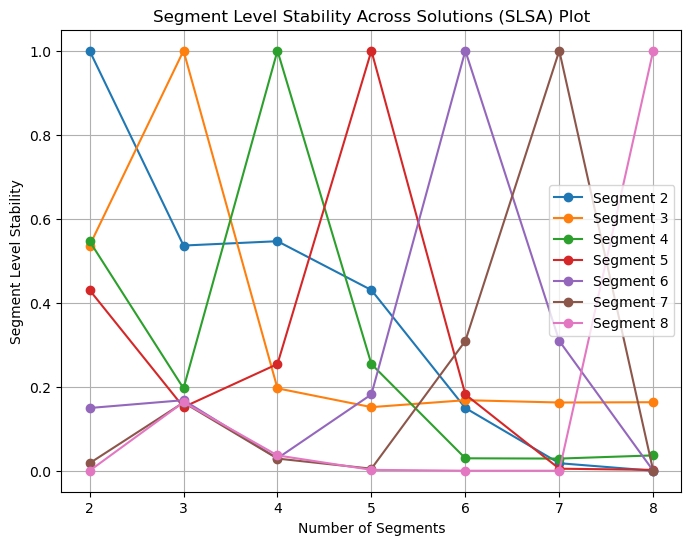

In [58]:
import matplotlib.pyplot as plt
import numpy as np

num_segments = range(2, 9)

segment_stability = []
for segment in range(2, 9):
    labels_segment = MD_km28[str(segment)].predict(MD_x)  # Assuming MD_x is your data
    segment_stability.append(labels_segment)

plt.figure(figsize=(8, 6))
for i, segment in enumerate(range(2, 9)):
    stability_values = [np.mean(segment_stability[i] == labels) for labels in segment_stability]
    plt.plot(num_segments, stability_values, marker='o', label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)

plt.show()


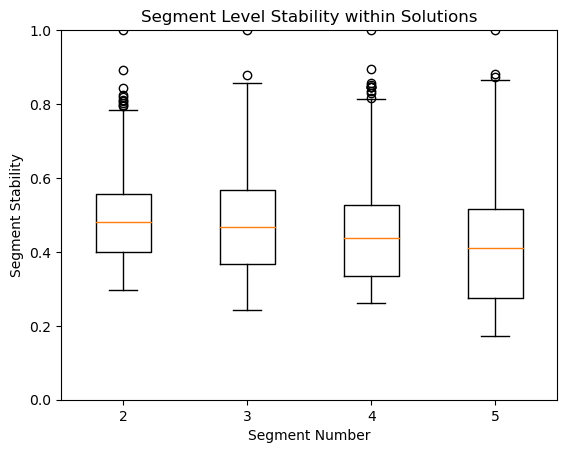

In [59]:
import matplotlib.pyplot as plt
import numpy as np

segment_solutions = ["2", "3", "4", "5"]
segment_labels = {}
segment_similarities = {}

for segment in segment_solutions:
    segment_labels[segment] = MD_km28[segment].predict(MD_x)  # Assuming MD_x is your data
    segment_similarities[segment] = MD_km28[segment].transform(MD_x).min(axis=1)

segment_stability_values = []
for segment in segment_solutions:
    similarities = segment_similarities[segment]
    normalized_similarities = similarities / np.max(similarities)
    segment_stability_values.append(normalized_similarities)

plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")

plt.show()


### Using Mixtures of Distributions

In [60]:
import numpy as np
import pandas as pd
from scipy.stats import entropy
from sklearn.cluster import KMeans

np.random.seed(1234)
k_values = range(2, 9)
MD_m28 = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=1234)
    model.fit(MD_x)  # Assuming MD_x is your data
    iter_val = model.n_iter_
    converged = model.n_init == 1 or model.inertia_ < 1e-10
    k_val = k
    k0_val = k
    log_likelihood = -model.inertia_
    n_samples, _ = MD_x.shape
    aic = -2 * log_likelihood + 2 * k
    bic = -2 * log_likelihood + np.log(n_samples) * k
    labels = model.labels_
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())
    class_entropy = entropy(probs)
    icl = bic - class_entropy
    
    MD_m28.append((iter_val, converged, k_val, k0_val, log_likelihood, aic, bic, icl))

MD_m28 = pd.DataFrame(MD_m28, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])
from tabulate import tabulate

# Assuming you have already created the MD_m28 DataFrame

# Display the DataFrame using tabulate
print(tabulate(MD_m28, headers='keys', tablefmt='grid', showindex=False))




C:\Users\gcaba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gcaba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\gcaba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gcaba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

+--------+-------------+-----+------+----------+---------+---------+---------+
|   iter | converged   |   k |   k0 |   logLik |     AIC |     BIC |     ICL |
+========+=============+=====+======+==========+=========+=========+=========+
|      6 | False       |   2 |    2 | -2145.5  | 4295.01 | 4305.57 | 4304.9  |
+--------+-------------+-----+------+----------+---------+---------+---------+
|      6 | False       |   3 |    3 | -1818.72 | 3643.44 | 3659.28 | 3658.21 |
+--------+-------------+-----+------+----------+---------+---------+---------+
|      9 | False       |   4 |    4 | -1604.11 | 3216.21 | 3237.34 | 3235.99 |
+--------+-------------+-----+------+----------+---------+---------+---------+
|     11 | False       |   5 |    5 | -1434.61 | 2879.22 | 2905.63 | 2904.04 |
+--------+-------------+-----+------+----------+---------+---------+---------+
|      8 | False       |   6 |    6 | -1331.65 | 2675.3  | 2706.99 | 2705.23 |
+--------+-------------+-----+------+----------+----

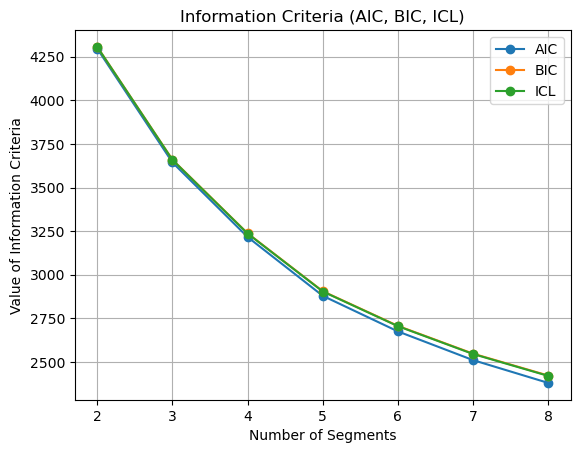

In [61]:
import matplotlib.pyplot as plt

num_segments = MD_m28["k"]
AIC_values = MD_m28["AIC"]
BIC_values = MD_m28["BIC"]
ICL_values = MD_m28["ICL"]

plt.plot(num_segments, AIC_values, marker='o', label='AIC')
plt.plot(num_segments, BIC_values, marker='o', label='BIC')
plt.plot(num_segments, ICL_values, marker='o', label='ICL')

plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC, ICL)')
plt.legend()
plt.grid(True)

plt.show()


In [62]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from tabulate import tabulate

k = 4
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(MD_x)
kmeans_clusters = kmeans.predict(MD_x)

gmm = GaussianMixture(n_components=k, random_state=1234)
gmm.fit(MD_x)
gmm_clusters = gmm.predict(MD_x)

results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

MD_m4 = MD_x[results['mixture'] == 3] 

k4_m4 = KMeans(n_clusters=k, random_state=1234)
k4_m4.fit(MD_m4)
k4_m4_clusters = k4_m4.predict(MD_m4)

results_m4 = pd.DataFrame({'kmeans': k4_m4_clusters, 'mixture': 3})

cross_tab1 = pd.crosstab(results['kmeans'], results['mixture'])
cross_tab2 = pd.crosstab(results['kmeans'], results_m4['kmeans'])

# Print the cross-tabulation tables using tabulate
print("Cross-tabulation Results (kmeans vs. mixture):")
print(tabulate(cross_tab1, headers='keys', tablefmt='grid'))

print("\nCross-tabulation Results (kmeans vs. kmeans for MD_m4):")
print(tabulate(cross_tab2, headers='keys', tablefmt='grid'))


C:\Users\gcaba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gcaba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\gcaba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\gcaba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` expl

Cross-tabulation Results (kmeans vs. mixture):
+----------+-----+-----+-----+-----+
|   kmeans |   0 |   1 |   2 |   3 |
+==========+=====+=====+=====+=====+
|        0 |  20 | 302 |   0 | 191 |
+----------+-----+-----+-----+-----+
|        1 |   2 | 116 |  59 | 189 |
+----------+-----+-----+-----+-----+
|        2 |  90 |  30 |  14 | 108 |
+----------+-----+-----+-----+-----+
|        3 |  17 | 150 |   1 | 164 |
+----------+-----+-----+-----+-----+

Cross-tabulation Results (kmeans vs. kmeans for MD_m4):
+----------+-----+-----+-----+-----+
|   kmeans |   0 |   1 |   2 |   3 |
+==========+=====+=====+=====+=====+
|        0 |  76 |  52 |  73 |  32 |
+----------+-----+-----+-----+-----+
|        1 |  40 |  39 |  51 |  27 |
+----------+-----+-----+-----+-----+
|        2 |  27 |  30 |  31 |  11 |
+----------+-----+-----+-----+-----+
|        3 |  43 |  35 |  51 |  34 |
+----------+-----+-----+-----+-----+


In [63]:
from sklearn.mixture import GaussianMixture
import numpy as np

gmm_m4a = GaussianMixture(n_components=4)
gmm_m4a.fit(MD_x)

log_likelihood_m4a = gmm_m4a.score(MD_x)

gmm_m4 = GaussianMixture(n_components=4)
gmm_m4.fit(MD_x)

log_likelihood_m4 = gmm_m4.score(MD_x)

print("Log-likelihood for MD_x.m4a:", log_likelihood_m4a)
print("Log-likelihood for MD_x.m4:", log_likelihood_m4)


Log-likelihood for MD_x.m4a: 11.727872558164462
Log-likelihood for MD_x.m4: 11.151316714845965


C:\Users\gcaba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\gcaba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


### Using Mixture of Regression Models

In [64]:
import numpy as np
import pandas as pd
from tabulate import tabulate

# Define a mapping of string values to numeric codes
like_mapping = {
    'I HATE IT!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    'I LOVE IT!+5': 5
}

data['Like.n'] = data['Like'].map(like_mapping)

# Count the occurrences of each numeric value
like_n_counts = data['Like.n'].value_counts().reset_index()
like_n_counts.columns = ['Numeric Value', 'Count']

# Print in a neat tabular format
print(tabulate(like_n_counts, headers='keys', tablefmt='pretty'))



+---+---------------+-------+
|   | Numeric Value | Count |
+---+---------------+-------+
| 0 |      0.0      | 169.0 |
| 1 |     -3.0      | 73.0  |
| 2 |     -4.0      | 71.0  |
| 3 |     -2.0      | 59.0  |
| 4 |     -1.0      | 58.0  |
+---+---------------+-------+


In [65]:
from patsy import dmatrices

independent_vars = data.columns[0:11] 

formula_str = ' + '.join(independent_vars)

formula_str = 'Like ~ ' + formula_str


f = dmatrices(formula_str, data=data)[1]

print(f)


[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


In [66]:
from sklearn.mixture import GaussianMixture
from patsy import dmatrix
np.random.seed(1234)

X = dmatrix(f.design_info, data=data)
y = dmatrix('Like', data=data)

n_components = 2
n_init = 10
verbose = False
n_rep=10

model = GaussianMixture(n_components=n_components, n_init=n_init, verbose=verbose)
MD_reg2 = model.fit(X, y)

print(MD_reg2)
cluster_sizes = np.bincount(model.predict(X))

print("Cluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"{i+1}: {size}")

C:\Users\gcaba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\gcaba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\gcaba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\gcaba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

GaussianMixture(n_components=2, n_init=10, verbose=False)
Cluster sizes:
1: 468
2: 985


C:\Users\gcaba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\gcaba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


### Profiling Segments

C:\Users\gcaba\AppData\Local\Temp\ipykernel_14740\3642040550.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis', len(MD_x.columns))


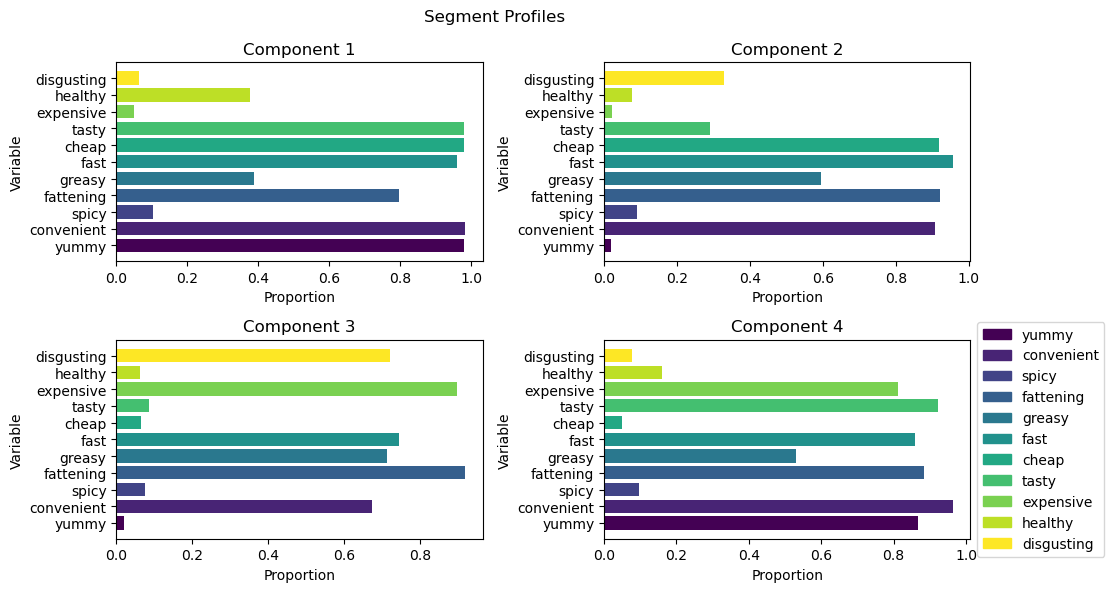

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

kmeans = MD_km28['4']

labels = kmeans.labels_

MD_mean = MD_x.groupby(labels).mean()

fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# Define a color map for the bars
color_map = plt.cm.get_cmap('viridis', len(MD_x.columns))

for i in range(4):
    num_variables = MD_mean.shape[1]
    num_segments = MD_mean.shape[0]
    bars = []

    for j in range(num_variables):
        color = color_map(j / num_variables)  # Assign a unique color for each variable
        bar = axs[i // 2, i % 2].barh(j, MD_mean.iloc[i, j], color=color)
        bars.append(bar)

    axs[i // 2, i % 2].set_title(f'Component {i + 1}')
    axs[i // 2, i % 2].set(ylabel='Variable', xlabel='Proportion')
    axs[i // 2, i % 2].set_yticks(range(num_variables))
    axs[i // 2, i % 2].set_yticklabels(MD_x.columns)

fig.suptitle('Segment Profiles')

fig.tight_layout()

# Create a legend with variable names and corresponding colors
handles = [plt.Rectangle((0, 0), 1, 1, color=color_map(i / num_variables)) for i in range(num_variables)]
plt.legend(handles, MD_x.columns, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


C:\Users\gcaba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gcaba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


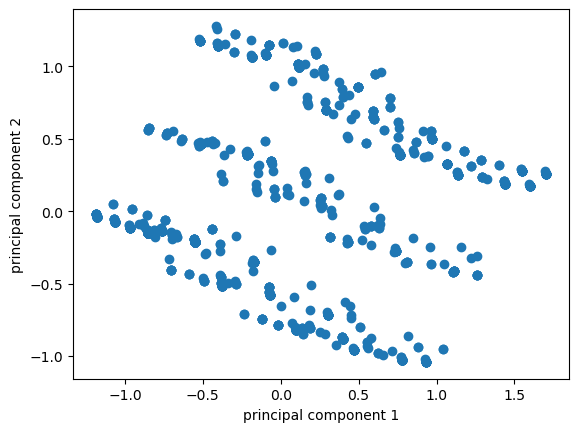

In [68]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=4)
kmeans.fit(MD_x)

pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x)

fig, ax = plt.subplots()

ax.scatter(MD_pca[:, 0], MD_pca[:, 1])
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
plt.show()

### Describing segments

C:\Users\gcaba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gcaba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


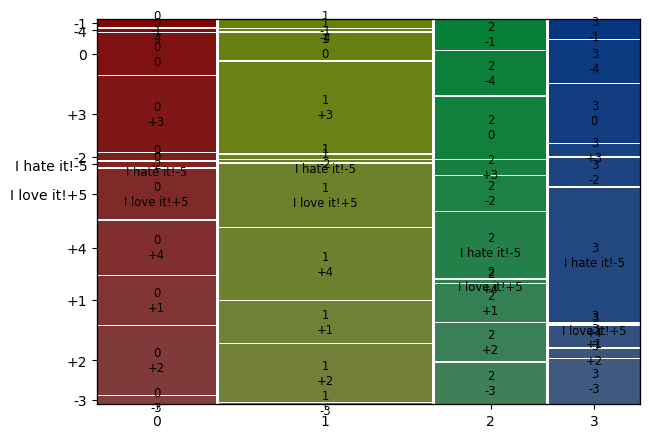

In [69]:
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.preprocessing import LabelEncoder

# Label encoding for categorical columns - Converting 11 columns with yes/no
def labelling(x):
    data[x] = LabelEncoder().fit_transform(data[x])
    return data

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)

df_eleven = data.loc[:, cat]

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_eleven)
data['cluster_num'] = kmeans.labels_ 

# Check unique values in the "Like" column
unique_like_values = data['Like'].unique()

# Create a crosstab with the unique values in the "Like" column
crosstab = pd.crosstab(data['cluster_num'], data['Like'])

# Reorder the columns based on unique_like_values
crosstab = crosstab[unique_like_values]

plt.rcParams['figure.figsize'] = (7, 5)
mosaic(crosstab.stack())
plt.show()


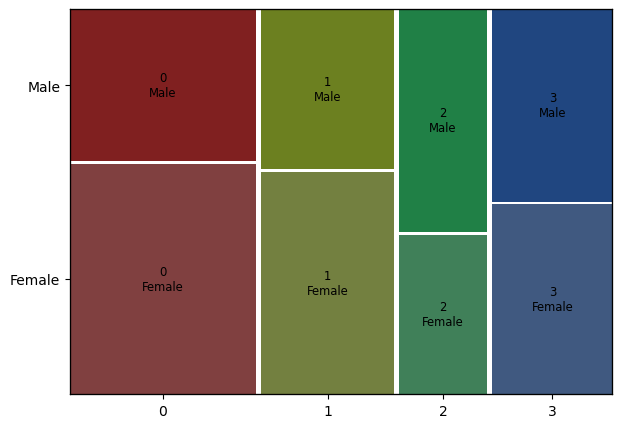

In [70]:
from statsmodels.graphics.mosaicplot import mosaic

MD_k4=MD_km28['4']
k4 = MD_k4.labels_

ct = pd.crosstab(k4, data['Gender'])
ct
mosaic(ct.stack(),gap=0.01)

plt.show()

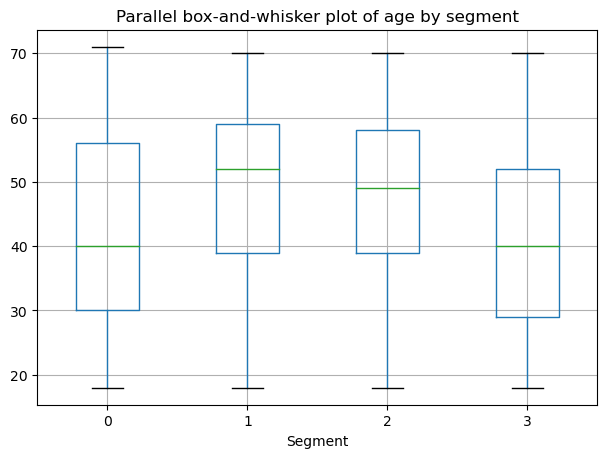

In [71]:
df = pd.DataFrame({'Segment': k4, 'Age': data['Age']})

df.boxplot(by='Segment', column='Age')
plt.title('Parallel box-and-whisker plot of age by segment')
plt.suptitle('')
plt.show()

In [72]:
data['VisitFrequency'] = LabelEncoder().fit_transform(data['VisitFrequency'])
visit = data.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.547988
1,1,2.584483
2,2,2.822368
3,3,2.654472


In [73]:
#Like
data['Like'] = LabelEncoder().fit_transform(data['Like'])
Like = data.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,3.798762
1,1,3.794828
2,2,5.430921
3,3,6.739837


In [74]:
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
Gender = data.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.523220
1,1,0.398276
2,2,0.411184
3,3,0.569106


### Selecting Target Section

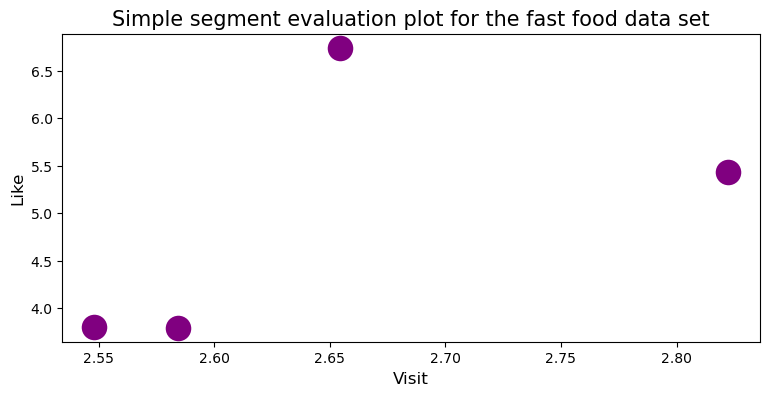

In [76]:
import seaborn as sns
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="purple")
plt.title("Simple segment evaluation plot for the fast food data set",fontsize = 15) 
plt.xlabel("Visit", fontsize = 12) 
plt.ylabel("Like", fontsize = 12) 
plt.show()